# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [2]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [3]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [4]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

In [5]:
print("="*60)
print("DATA EXPLORATION")
print("="*60)

print("\nData Types:")
print(X_train.dtypes)

print("\nMissing Values in Training Set:")
print(X_train.isnull().sum())

print("\nNumerical Features Summary:")
print(X_train.describe())

print("\nCategorical Features Unique Counts:")
categorical_cols = X_train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {X_train[col].nunique()} unique values")
    
print("\nText Data Sample:")
print(f"Review Text length - Min: {X_train['Review Text'].str.len().min()}, Max: {X_train['Review Text'].str.len().max()}, Mean: {X_train['Review Text'].str.len().mean():.0f}")
print(f"Title length - Min: {X_train['Title'].str.len().min()}, Max: {X_train['Title'].str.len().max()}, Mean: {X_train['Title'].str.len().mean():.0f}")

print("\nTarget Distribution:")
print(f"Recommended (1): {(y_train == 1).sum()} ({(y_train == 1).sum()/len(y_train)*100:.1f}%)")
print(f"Not Recommended (0): {(y_train == 0).sum()} ({(y_train == 0).sum()/len(y_train)*100:.1f}%)")


DATA EXPLORATION

Data Types:
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

Missing Values in Training Set:
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

Numerical Features Summary:
        Clothing ID           Age  Positive Feedback Count
count  16597.000000  16597.000000             16597.000000
mean     954.951618     43.370609                 2.713924
std      141.863331     12.216240                 6.014332
min        2.000000     18.000000                 0.000000
25%      863.000000     34.000000                 0.000000
50%      952.000000    

## Building Pipeline

###  Step 1: Create Text-Based Features

In [6]:
def create_text_features(X):
    """
    Create engineered features from text data.
    Features include review length, word count, and sentiment indicators.
    """
    X = X.copy()
    
    # Review Text features
    X['review_length'] = X['Review Text'].fillna('').apply(len)
    X['review_word_count'] = X['Review Text'].fillna('').apply(
        lambda x: len(str(x).split())
    )
    
    # Title features
    X['title_length'] = X['Title'].fillna('').apply(len)
    X['title_word_count'] = X['Title'].fillna('').apply(
        lambda x: len(str(x).split())
    )
    
    # Sentiment indicators (basic)
    positive_words = ['love', 'amazing', 'great', 'excellent', 'perfect', 'best', 'good', 'beautiful', 'awesome']
    negative_words = ['hate', 'terrible', 'awful', 'bad', 'worst', 'poor', 'disappointing', 'ugly', 'waste']
    
    X['positive_word_count'] = X['Review Text'].fillna('').apply(
        lambda x: sum(1 for word in positive_words if word in str(x).lower())
    )
    X['negative_word_count'] = X['Review Text'].fillna('').apply(
        lambda x: sum(1 for word in negative_words if word in str(x).lower())
    )
    
    return X

# Create features for train and test sets
X_train_features = create_text_features(X_train)
X_test_features = create_text_features(X_test)

print("Text features created!")
print(X_train_features.head())


Text features created!
       Clothing ID  Age                              Title  \
893           1060   37  Super cute. pockets would be nice   
1767          1072   23              Great for all seasons   
4491          1078   41                            Just ok   
17626          862   52                        Cute but...   
11184         1083   28           Grandmas draperies dress   

                                             Review Text  \
893    Easy and fun jumper. runs slightly large. i or...   
1767   The dress looks great both in winter and summe...   
4491   I wanted to love this dress as it seemed perfe...   
17626  I loved this shirt when i purchased it but it ...   
11184  I had to review this because i purchased befor...   

       Positive Feedback Count   Division Name Department Name Class Name  \
893                          2  General Petite         Bottoms      Pants   
1767                         0  General Petite         Dresses    Dresses   
4491        

### Step 2: Build Preprocessing Pipeline


In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Define column groups
numerical_features = ['Age', 'Positive Feedback Count', 'review_length', 
                     'review_word_count', 'title_length', 'title_word_count',
                     'positive_word_count', 'negative_word_count']

categorical_features = ['Clothing ID', 'Division Name', 'Department Name', 'Class Name']

# Numerical transformer
numerical_transformer = StandardScaler()

# Categorical transformer
categorical_transformer = OneHotEncoder(
    handle_unknown='ignore',
    sparse_output=False,
    max_categories=50
)

# Text transformers (TF-IDF)
text_transformer_review = TfidfVectorizer(
    max_features=100,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.8
)

text_transformer_title = TfidfVectorizer(
    max_features=50,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.8
)

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('text_review', text_transformer_review, 'Review Text'),
        ('text_title', text_transformer_title, 'Title'),
    ],
    remainder='drop'
)

print("Preprocessor created successfully!")

Preprocessor created successfully!


### Step 3: Create Full Pipeline with Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        random_state=27,
        n_jobs=-1
    ))
])

print("Pipeline created successfully!")

Pipeline created successfully!


## Training Pipeline

In [9]:
# Train the pipeline
print("\n" + "="*60)
print("TRAINING PIPELINE")
print("="*60)

pipeline.fit(X_train_features, y_train)

print("\nPipeline training complete!")


TRAINING PIPELINE

Pipeline training complete!


In [10]:
# Make predictions on training set
y_pred_train = pipeline.predict(X_train_features)

In [11]:
# Evaluate on training set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, zero_division=0)
train_recall = recall_score(y_train, y_pred_train, zero_division=0)
train_f1 = f1_score(y_train, y_pred_train, zero_division=0)

print("\nTRAINING SET RESULTS:")
print(f"Accuracy:  {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall:    {train_recall:.4f}")
print(f"F1-Score:  {train_f1:.4f}")



TRAINING SET RESULTS:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


In [12]:
# Cross-validation on training set
from sklearn.model_selection import cross_val_score

print("\n" + "="*60)
print("CROSS-VALIDATION RESULTS")
print("="*60)

metrics = ['accuracy', 'precision', 'recall', 'f1']

for metric in metrics:
    scores = cross_val_score(pipeline, X_train_features, y_train, cv=5, scoring=metric)
    print(f"\n{metric.upper()}:")
    print(f"  Scores: {[f'{s:.4f}' for s in scores]}")
    print(f"  Mean: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


CROSS-VALIDATION RESULTS

ACCURACY:
  Scores: ['0.8482', '0.8506', '0.8448', '0.8415', '0.8421']
  Mean: 0.8455 (+/- 0.0070)

PRECISION:
  Scores: ['0.8536', '0.8511', '0.8511', '0.8494', '0.8477']
  Mean: 0.8506 (+/- 0.0039)

RECALL:
  Scores: ['0.9823', '0.9900', '0.9815', '0.9793', '0.9830']
  Mean: 0.9832 (+/- 0.0072)

F1:
  Scores: ['0.9134', '0.9153', '0.9116', '0.9097', '0.9104']
  Mean: 0.9121 (+/- 0.0041)


## Fine-Tuning Pipeline

In [13]:
# Hyperparameter Fine-Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

print("\n" + "="*60)
print("FINE-TUNING HYPERPARAMETERS")
print("="*60)

# Define parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
}

# Create GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("\nRunning GridSearchCV with 5-fold cross-validation...")
grid_search.fit(X_train_features, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")

# Use the best model for final evaluation
best_pipeline = grid_search.best_estimator_


FINE-TUNING HYPERPARAMETERS

Running GridSearchCV with 5-fold cross-validation...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best cross-validation F1 score: 0.9126


In [14]:
# Evaluate on Training Set with Best Model
y_pred_train_tuned = best_pipeline.predict(X_train_features)

train_accuracy_tuned = accuracy_score(y_train, y_pred_train_tuned)
train_precision_tuned = precision_score(y_train, y_pred_train_tuned, zero_division=0)
train_recall_tuned = recall_score(y_train, y_pred_train_tuned, zero_division=0)
train_f1_tuned = f1_score(y_train, y_pred_train_tuned, zero_division=0)

print("\nTRAINING SET RESULTS (After Fine-Tuning):")
print(f"Accuracy:  {train_accuracy_tuned:.4f}")
print(f"Precision: {train_precision_tuned:.4f}")
print(f"Recall:    {train_recall_tuned:.4f}")
print(f"F1-Score:  {train_f1_tuned:.4f}")


TRAINING SET RESULTS (After Fine-Tuning):
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


In [15]:
# Evaluate on Test Set
print("\n" + "="*60)
print("FINAL MODEL EVALUATION - TEST SET")
print("="*60)

y_pred_test = best_pipeline.predict(X_test_features)

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, zero_division=0)
test_recall = recall_score(y_test, y_pred_test, zero_division=0)
test_f1 = f1_score(y_test, y_pred_test, zero_division=0)

print("\nTEST SET RESULTS:")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
print(f"\nTrue Negatives:  {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives:  {cm[1,1]}")


FINAL MODEL EVALUATION - TEST SET

TEST SET RESULTS:
Accuracy:  0.8488
Precision: 0.8534
Recall:    0.9855
F1-Score:  0.9147

Confusion Matrix:
[[  70  257]
 [  22 1496]]

True Negatives:  70
False Positives: 257
False Negatives: 22
True Positives:  1496


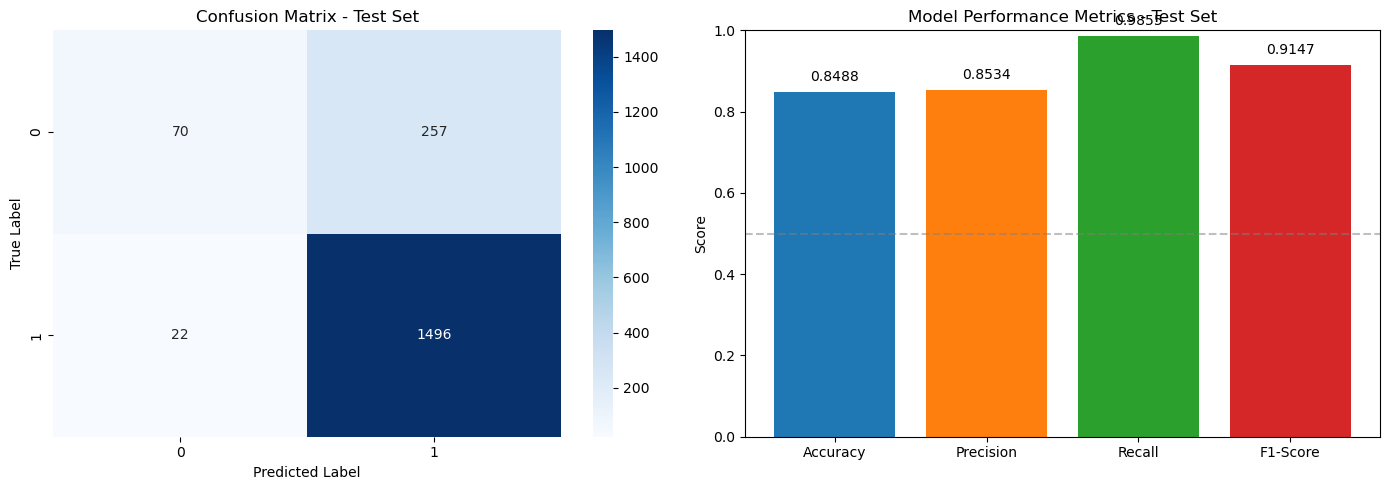

In [16]:
# Visualization of Results
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Test Set')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Metrics Comparison
metrics_dict = {
    'Accuracy': test_accuracy,
    'Precision': test_precision,
    'Recall': test_recall,
    'F1-Score': test_f1
}

axes[1].bar(metrics_dict.keys(), metrics_dict.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
axes[1].set_ylabel('Score')
axes[1].set_title('Model Performance Metrics - Test Set')
axes[1].set_ylim([0, 1])
axes[1].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)

for i, (k, v) in enumerate(metrics_dict.items()):
    axes[1].text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [17]:
# Summary Comparison
print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)

print("\nTRAINING SET PERFORMANCE (Final Model):")
print(f"  Accuracy:  {train_accuracy_tuned:.4f}")
print(f"  Precision: {train_precision_tuned:.4f}")
print(f"  Recall:    {train_recall_tuned:.4f}")
print(f"  F1-Score:  {train_f1_tuned:.4f}")

print("\nTEST SET PERFORMANCE (Final Model):")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  F1-Score:  {test_f1:.4f}")

print("\n✓ Pipeline successfully built, trained, fine-tuned, and evaluated!")



FINAL SUMMARY

TRAINING SET PERFORMANCE (Final Model):
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

TEST SET PERFORMANCE (Final Model):
  Accuracy:  0.8488
  Precision: 0.8534
  Recall:    0.9855
  F1-Score:  0.9147

✓ Pipeline successfully built, trained, fine-tuned, and evaluated!
